<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/AnaliseDadosRV1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       col_0  col_1                 col_2  col_3 col_4  col_5 col_6 col_7  \
0   Feminino  25-34  Não tenho  a certeza      5   Não    2.0   NaN   NaN   
1   Feminino  25-34                   Sim      5   Não    1.0   NaN   NaN   
2   Feminino  25-34                   Sim      4   Não    1.0   NaN   NaN   
3  Masculino  35-44                   Sim      1   Não    1.0   NaN   NaN   
4  Masculino  19-24                   Sim      5   Não    5.0   NaN   NaN   

                                               col_8 col_9  ... col_39 col_40  \
0  Realismo visual, Interação com o ambiente virt...   NaN  ...      4      4   
1  Realismo visual, Interação com o ambiente virt...   NaN  ...      5      4   
2                                    Realismo visual   NaN  ...      3      3   
3                                    Realismo visual   NaN  ...      3      2   
4  Realismo visual, Interação com o ambiente virt...   NaN  ...      5      5   

  col_41 col_42 col_43 col_44 col_45  col_46  \
0 

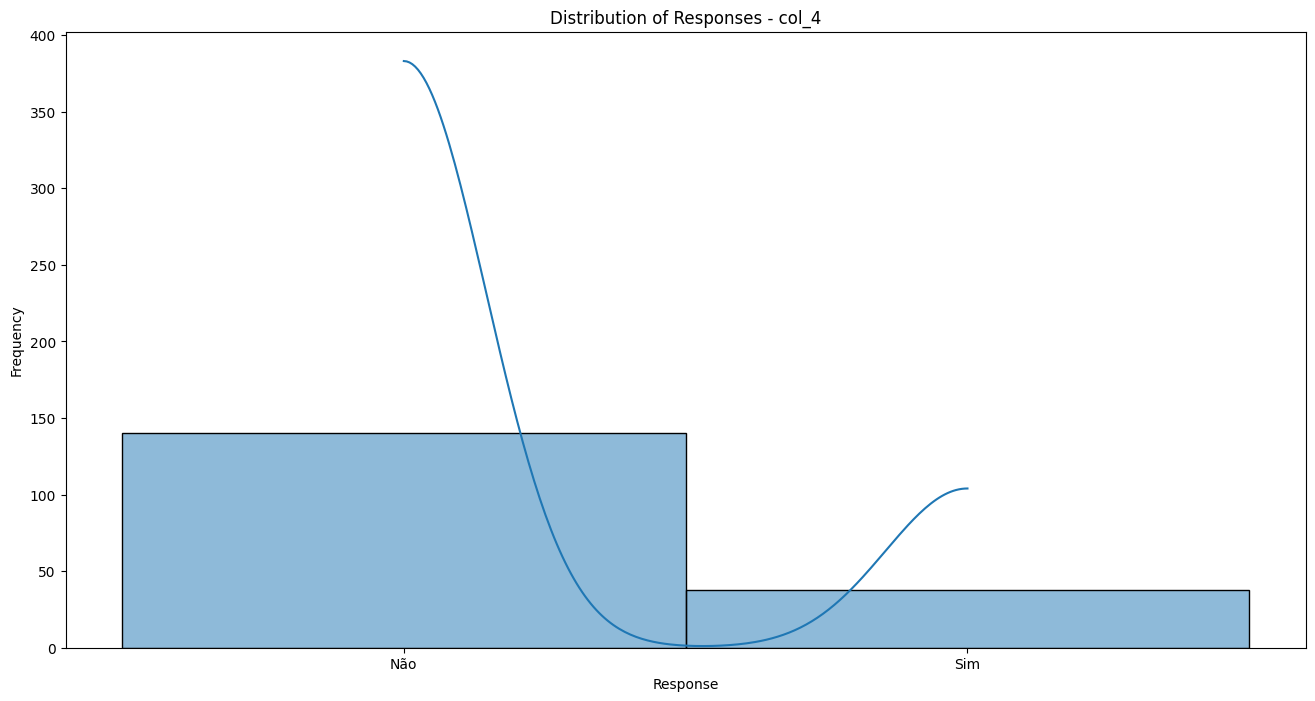

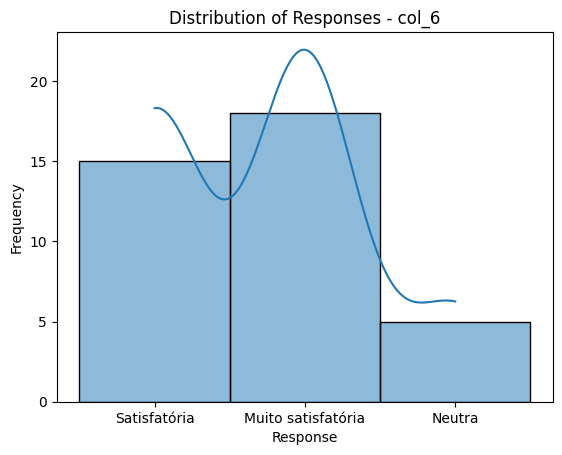

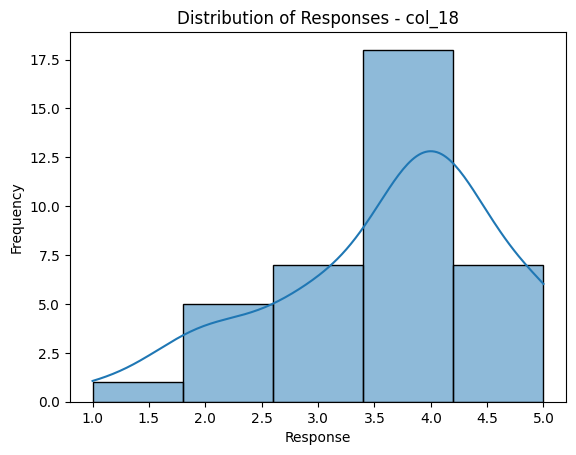

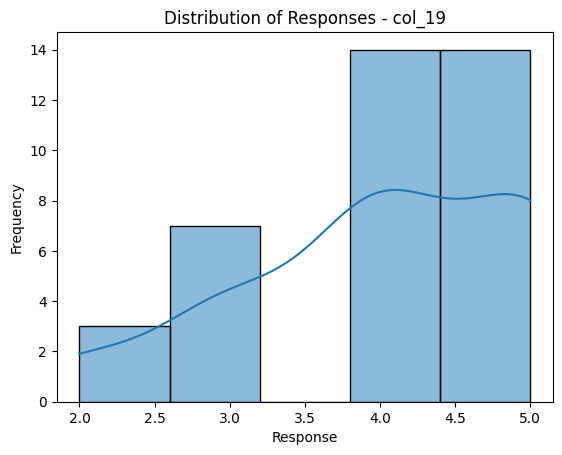

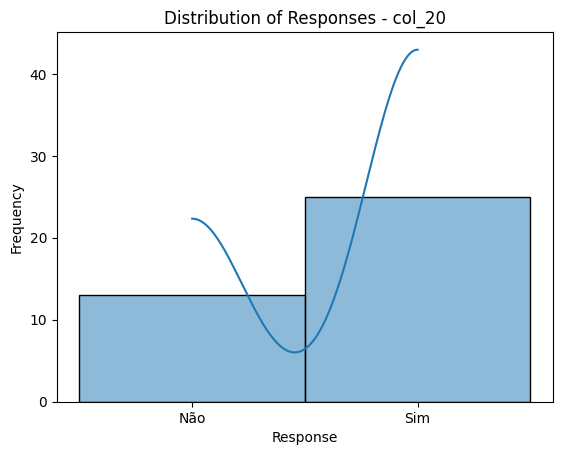

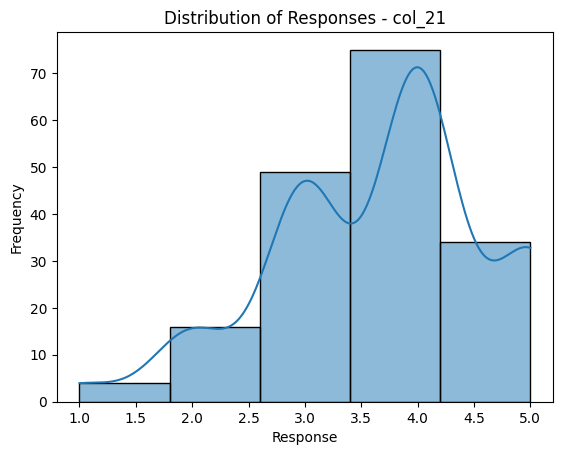

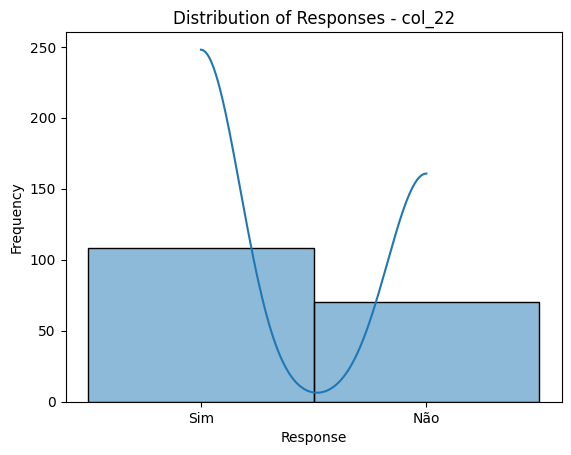

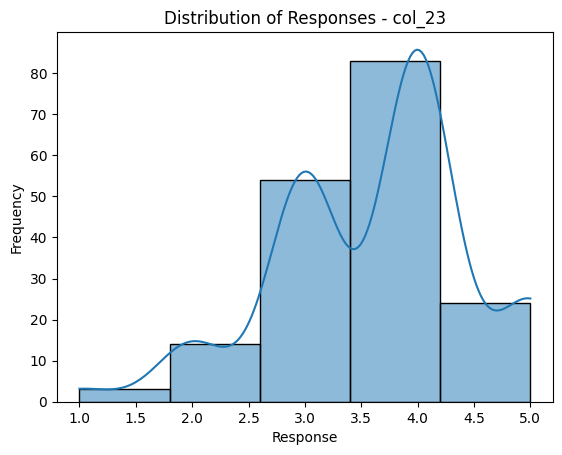

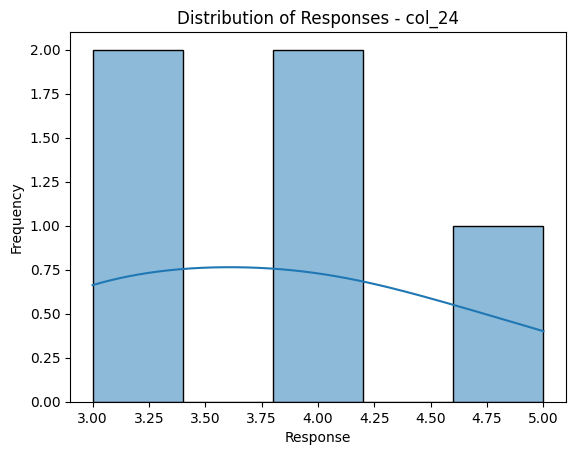

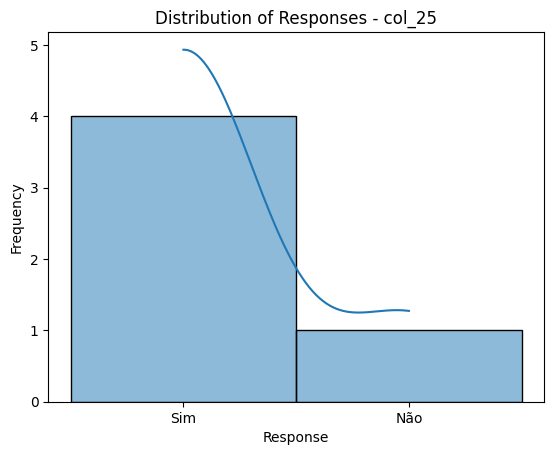

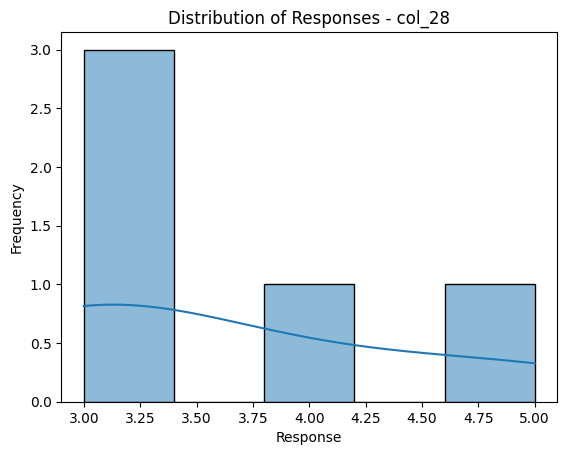

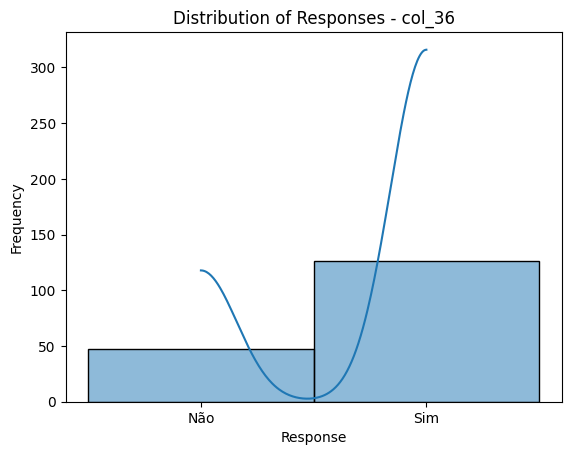

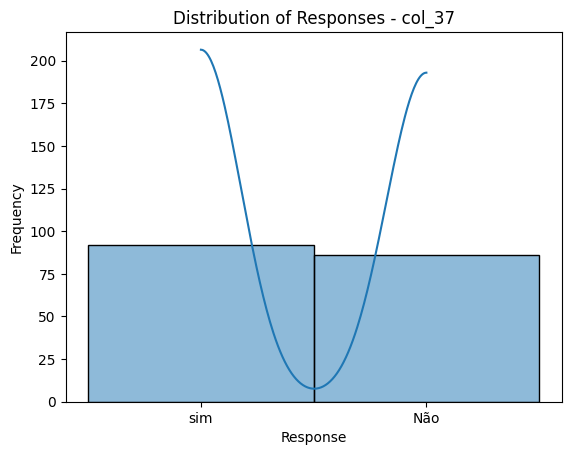

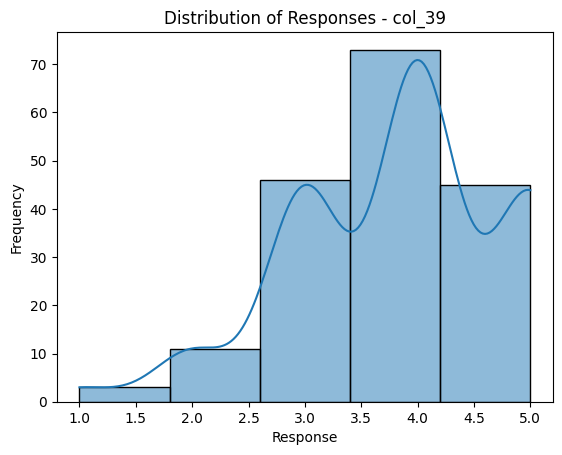

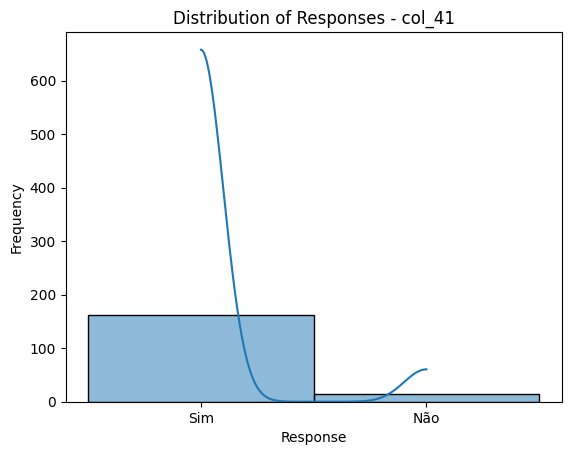

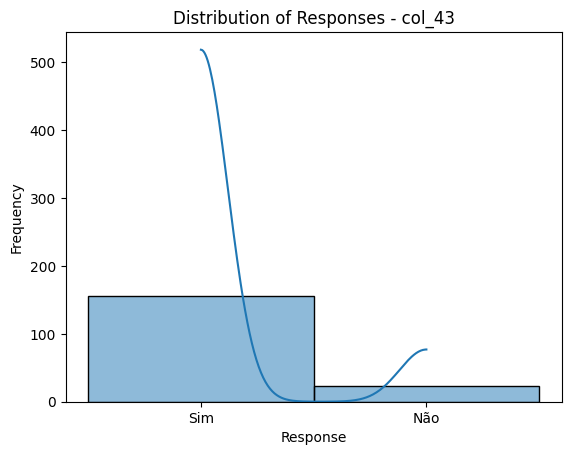

<ipython-input-14-262ff9022e41>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_data.replace({'Sim': 1, 'Não': 0}, inplace=True)
<ipython-input-14-262ff9022e41>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_data.fillna(0, inplace=True)
<ipython-input-14-262ff9022e41>:60: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  binary_ratios = binary_data.sum() / len(binary_data)


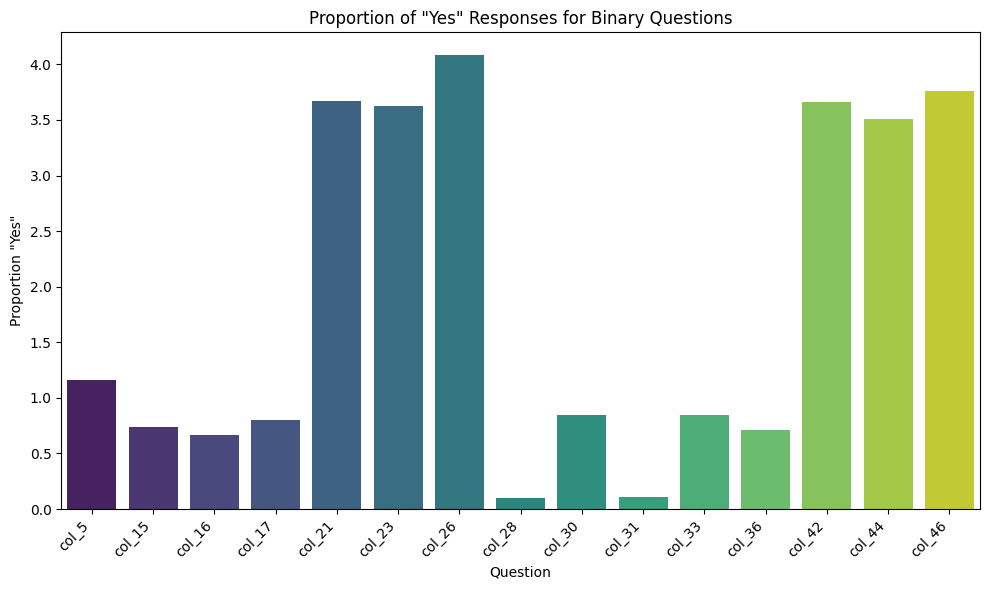

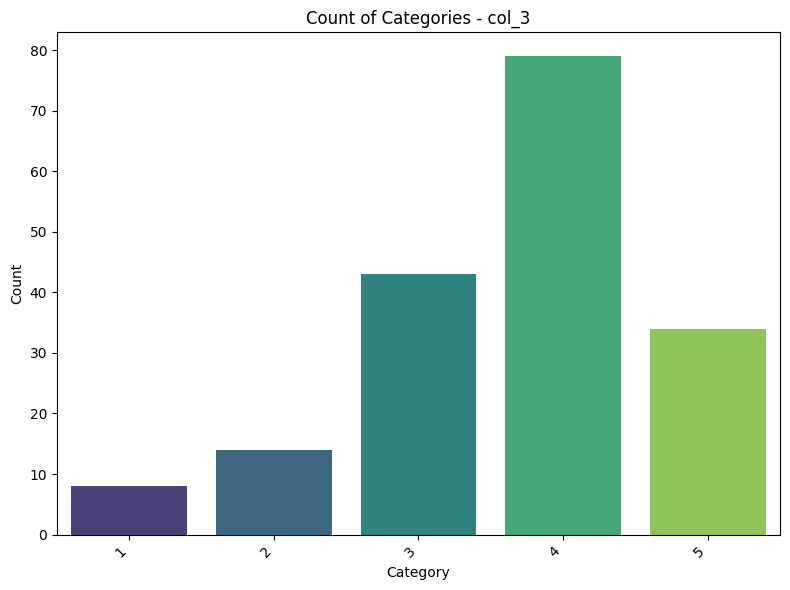

<ipython-input-14-262ff9022e41>:83: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


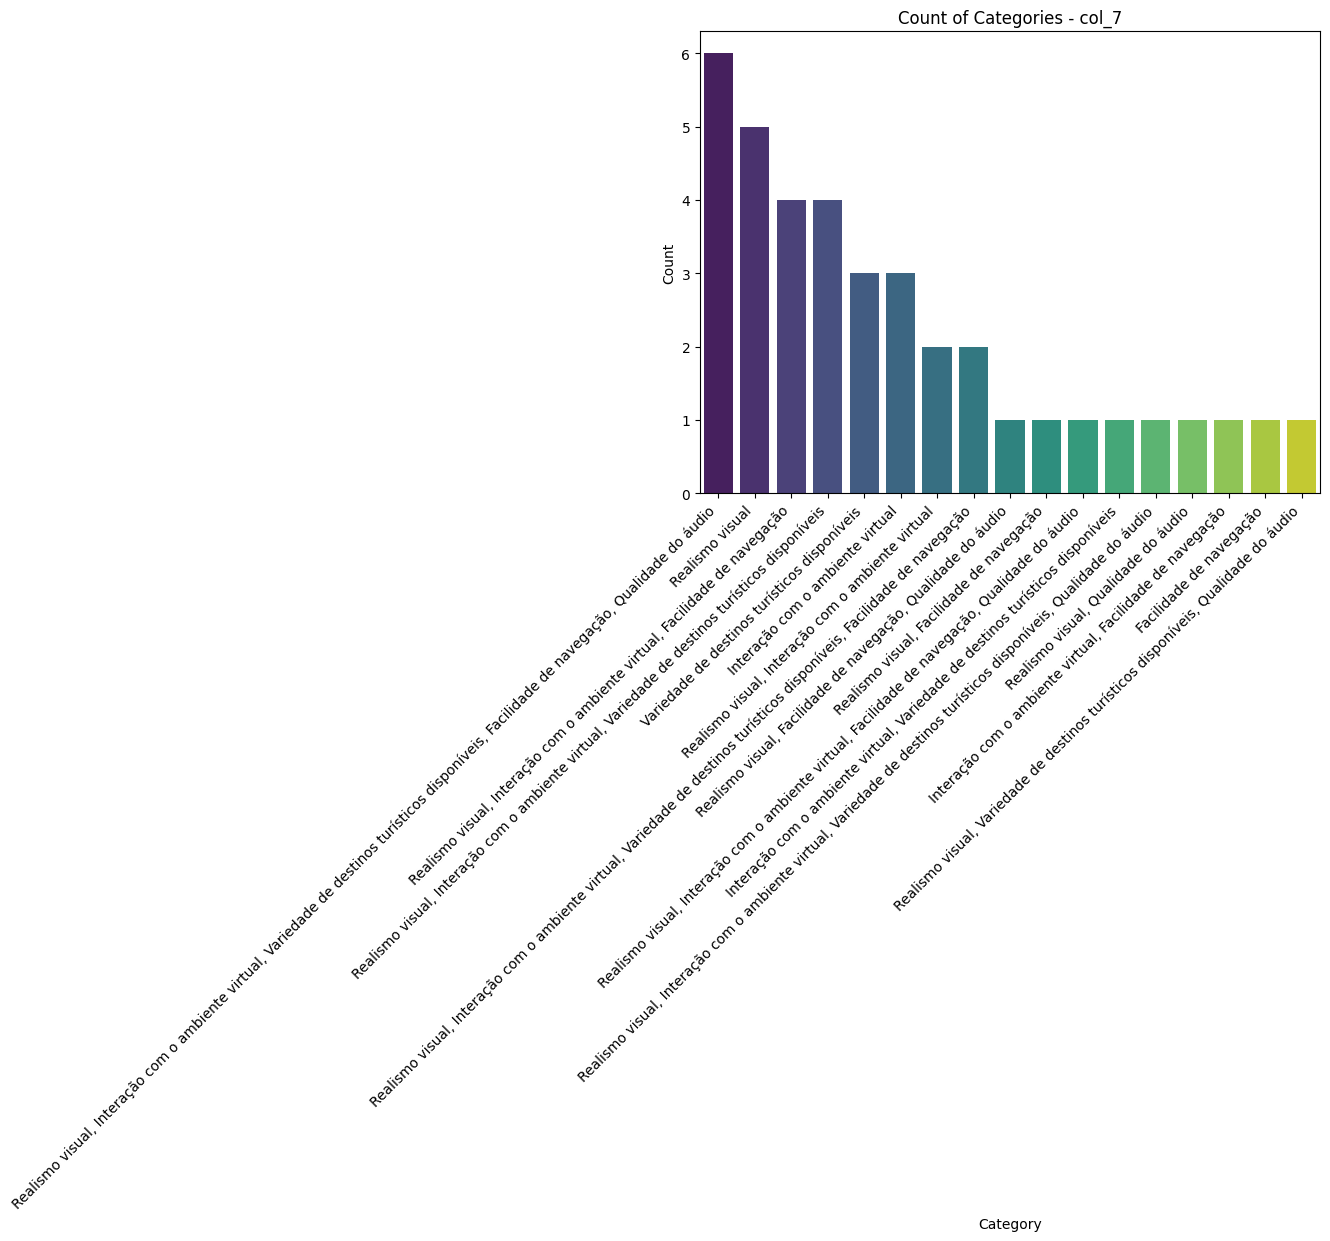

<ipython-input-14-262ff9022e41>:83: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


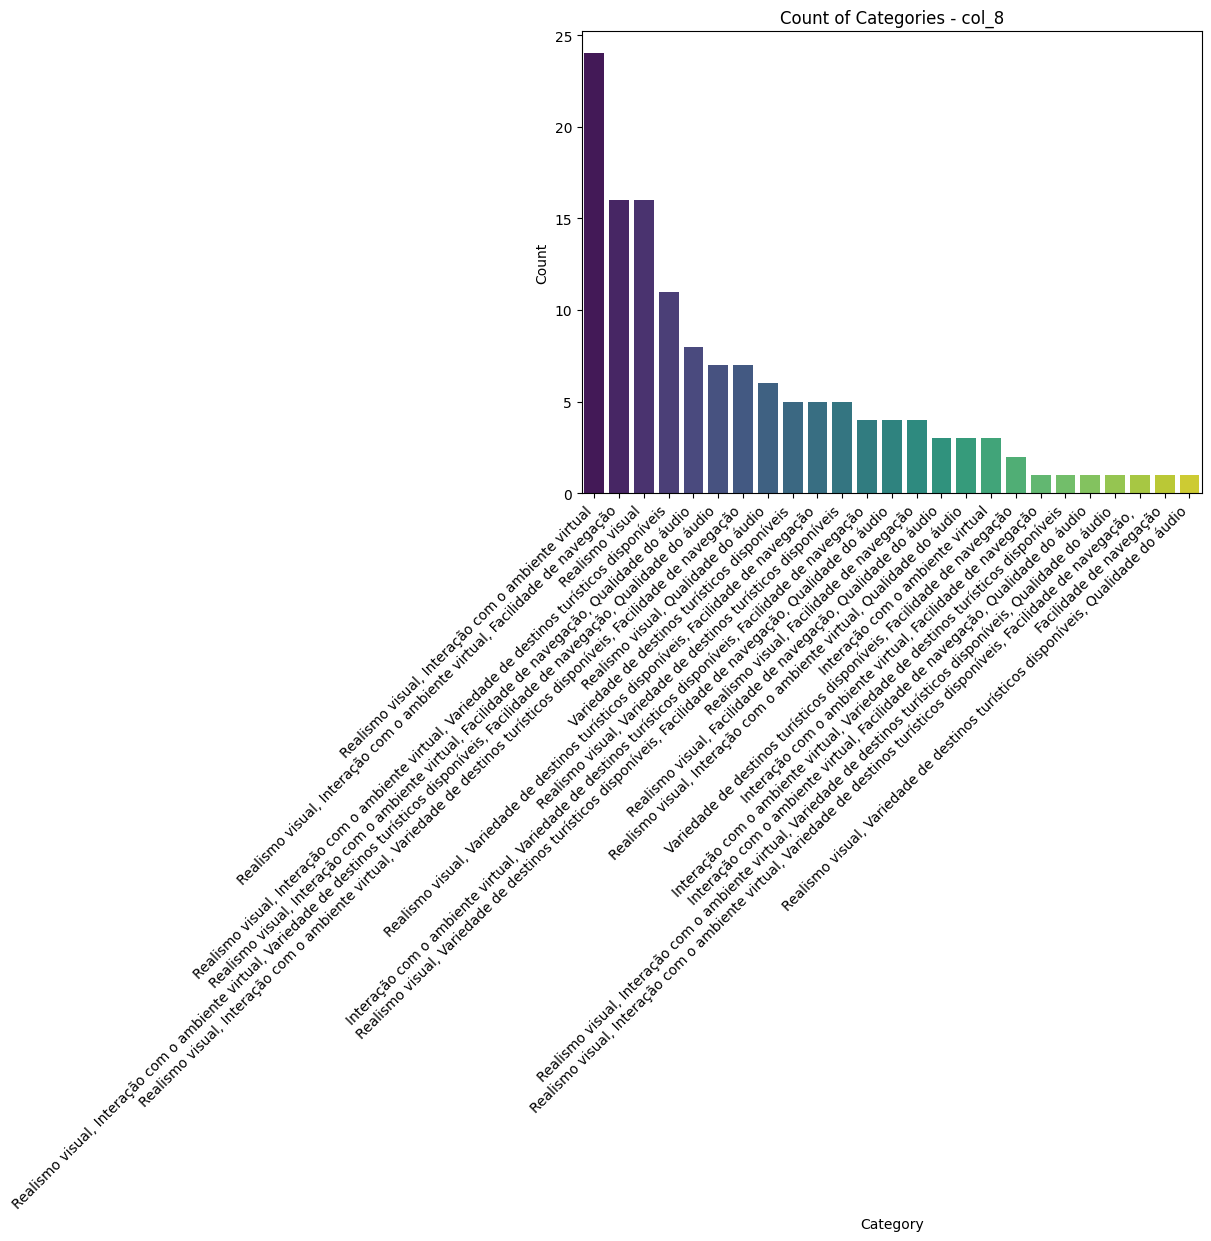

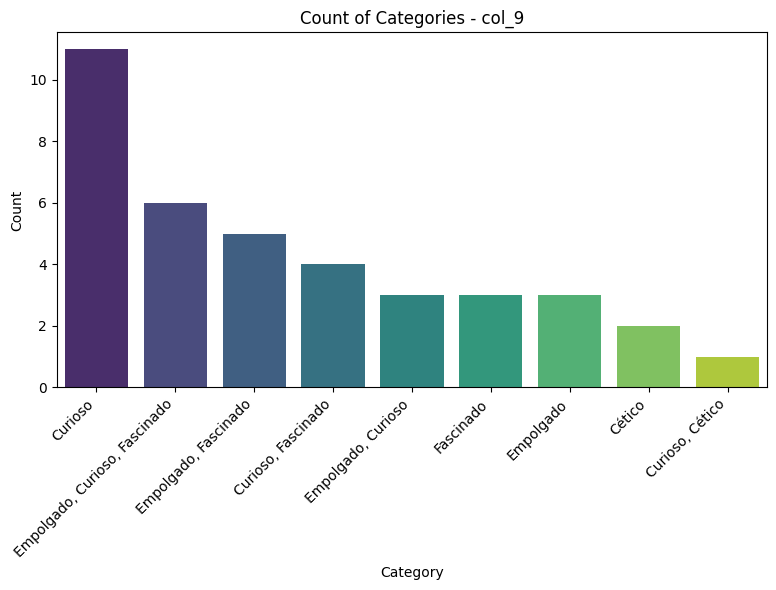

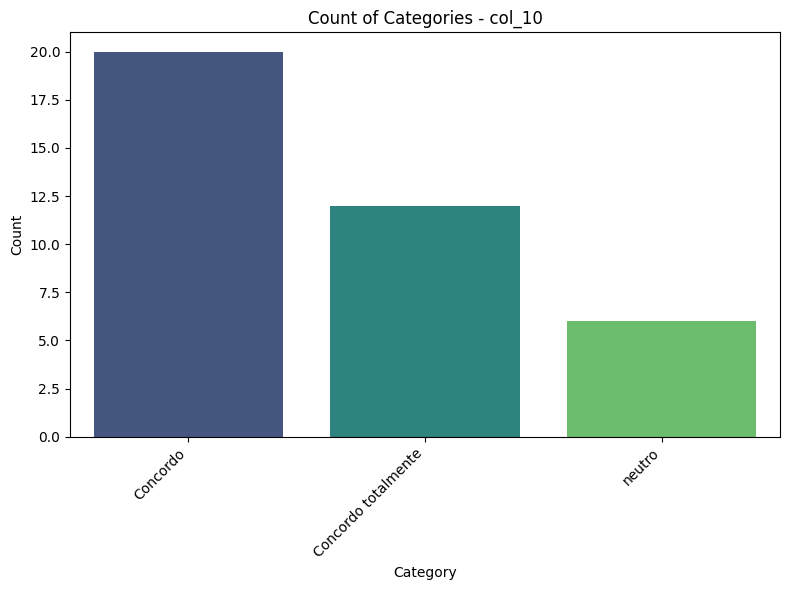

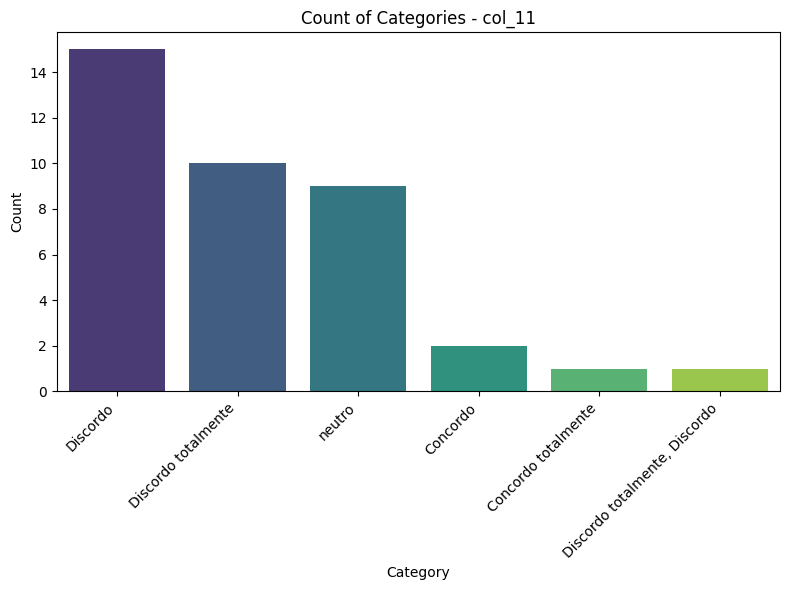

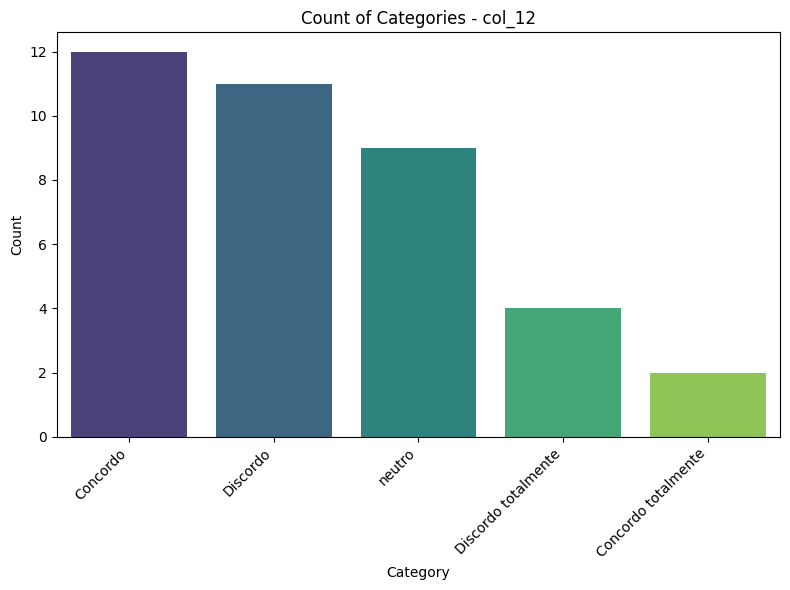

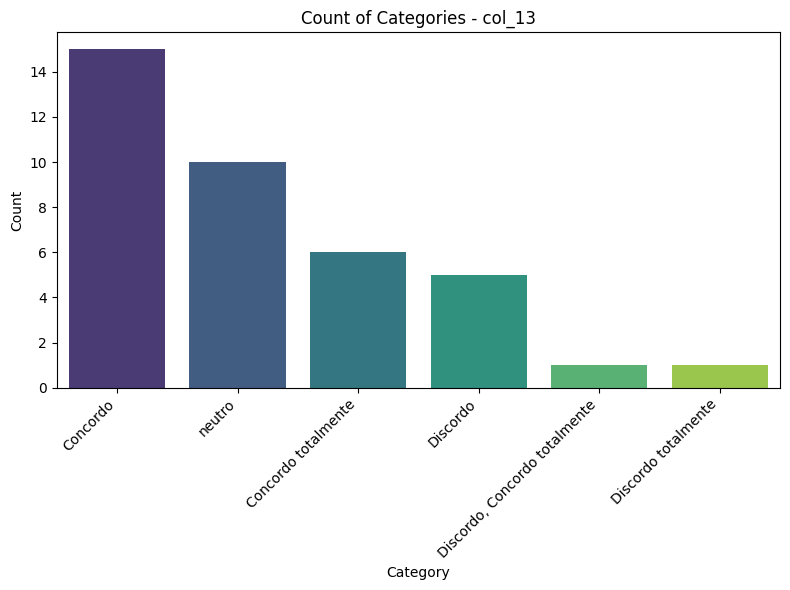

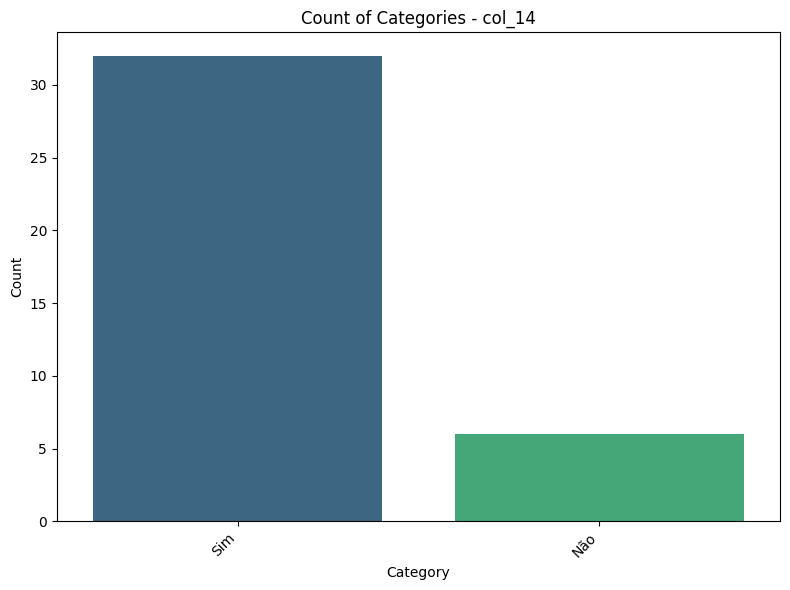

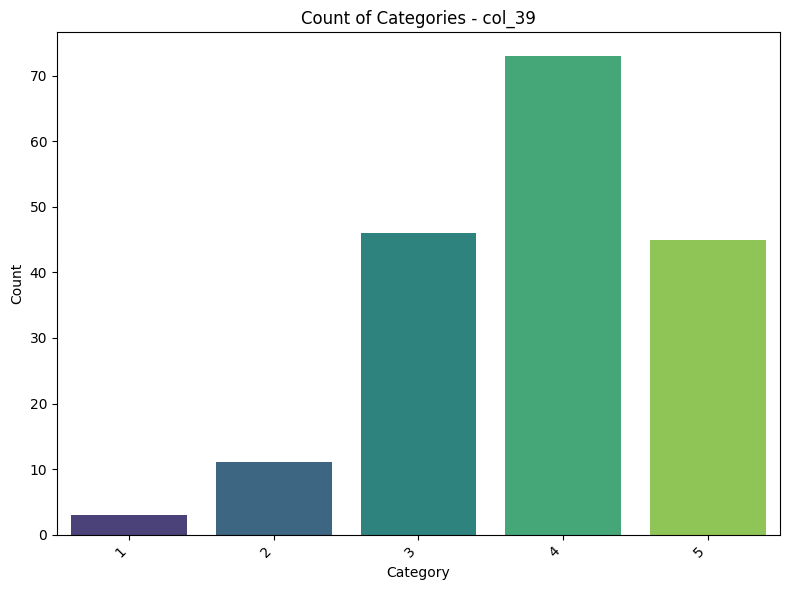

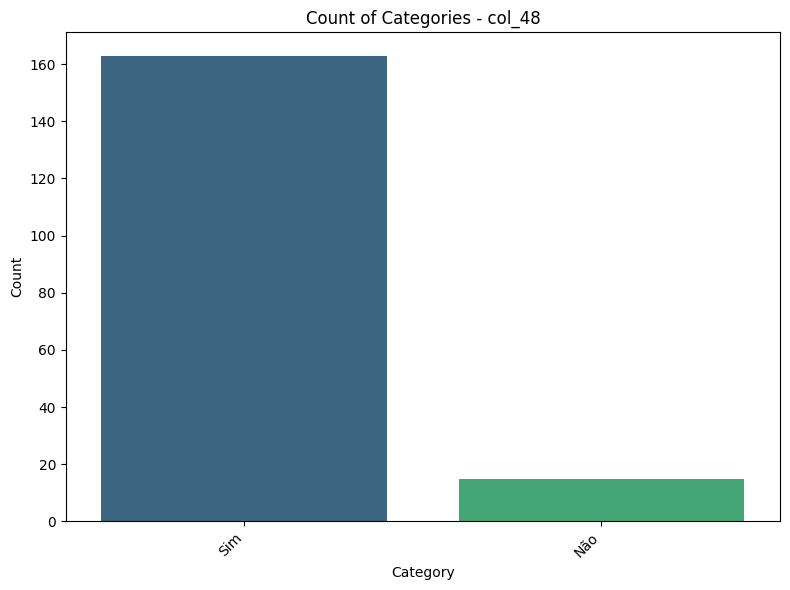

Analysis by Gender:
             col_18    col_19    col_21    col_23    col_24    col_28  \
col_0                                                                   
Feminino   3.481481  3.925926  3.654135  3.571429  3.333333  3.666667   
Masculino  4.090909  4.272727  3.711111  3.777778  4.500000  3.500000   

             col_39  
col_0                
Feminino   3.819549  
Masculino  3.822222  
All likert column indices are valid!

Analysis by Gender:
             col_18    col_19    col_21    col_23    col_24    col_28  \
col_0                                                                   
Feminino   0.706767  0.796992  3.654135  3.571429  0.075188  0.082707   
Masculino  1.000000  1.044444  3.711111  3.777778  0.200000  0.155556   

             col_39  
col_0                
Feminino   3.819549  
Masculino  3.822222  

Sample Errors for Likert columns:
col_18    0.117968
col_19    0.128160
col_21    0.072026
col_23    0.065648
col_24    0.048126
col_28    0.045832
col_39    0

<ipython-input-14-262ff9022e41>:90: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  analise_por_genero = df.groupby('col_0')[df.columns[likert_column_indices]].mean()


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel data file
excel_file = '/content/sample_data/respostas.xlsx'
df = pd.read_excel(excel_file)

# Reset columns for clarity
df.columns = [f'col_{i}' for i in range(df.shape[1])]

# Display the first few rows for inspection
print(df.head())

# Descriptive statistics
desc_stats = df.describe(include='all')
print(desc_stats)

# Assuming columns from col_4 to col_43 are Likert scale columns (based on the data snippet you shared)
likert_column_indices = [4,6,18,19,20,21,22,23,24,25,28,36,37,39,41,43]

# Handling NaN values for the Likert scale columns
#df[likert_column_indices] = df[likert_column_indices].fillna(0)

# Before plotting, verify if the columns pointed by likert_column_indices contain the expected data
for col in likert_column_indices:
    print(f"Column Name: {df.columns[col]}, NaN Values: {df[df.columns[col]].isna().sum()}")

# Plotting histograms for each Likert scale column
plt.figure(figsize=(16, 8))
for col in likert_column_indices:
    column_name = df.columns[col]
    sns.histplot(data=df, x=column_name, bins=5, kde=True)
    plt.title(f'Distribution of Responses - {column_name}')
    plt.xlabel('Response')
    plt.ylabel('Frequency')
    plt.show()

# The remaining code (for binary and categorical responses) can be similarly adjusted.

# Analysis for binary responses

#binary_column_indices = [5, 15, 16, 17, 21, 23, 26, 28, 30, 31, 33, 34, 36, 37, 38, 42, 44, 46, 49]
binary_column_indices = [5, 15, 16, 17, 21, 23, 26, 28, 30, 31, 33, 34, 36, 37, 38, 42, 44, 46]

max_index = len(df.columns) - 1
invalid_indices = [i for i in binary_column_indices if i > max_index]

if invalid_indices:
    print(f"Invalid column indices: {invalid_indices}")
    raise ValueError("Invalid column indices found!")

binary_data = df.iloc[:, binary_column_indices]

binary_data.replace({'Sim': 1, 'Não': 0}, inplace=True)

binary_data.fillna(0, inplace=True)

binary_ratios = binary_data.sum() / len(binary_data)

plt.figure(figsize=(10, 6))
sns.barplot(x=binary_ratios.index, y=binary_ratios.values, palette="viridis")
plt.title('Proportion of "Yes" Responses for Binary Questions')
plt.xlabel('Question')
plt.ylabel('Proportion "Yes"')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

categorical_column_indices = [3, 7, 8, 9, 10, 11, 12, 13, 14, 39, 48]

for index in categorical_column_indices:
    categorical_data = df.iloc[:, index]
    categorical_counts = categorical_data.value_counts()

    plt.figure(figsize=(8, 6))
    sns.barplot(x=categorical_counts.index, y=categorical_counts.values, palette="viridis")
    plt.title(f'Count of Categories - {df.columns[index]}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Analysis by segments (e.g., gender or age)
# Assuming 'Sexo' is a column name in your dataset for gender.
# If not, adjust this as per your dataset.
#analise_por_genero = df.groupby('Sexo')[df.columns[likert_column_indices]].mean()
analise_por_genero = df.groupby('col_0')[df.columns[likert_column_indices]].mean()

print("Analysis by Gender:")
print(analise_por_genero)

#############################################################################################
import pandas as pd
import numpy as np
from scipy.stats import sem

# Assuming df is your dataframe and it's already loaded

# Use column names instead of integer indices for likert_column_indices
likert_column_indices = ['col_18', 'col_19', 'col_21', 'col_23', 'col_24', 'col_28', 'col_39']

# Validate the likert_column_indices
valid_columns = df.columns.tolist()
likert_column_indices = [col for col in likert_column_indices if col in valid_columns]

# Verify if all column indices are valid
if set(likert_column_indices).difference(set(valid_columns)):
    print("Some likert column indices are not valid!")
    print(set(likert_column_indices).difference(set(valid_columns)))
else:
    print("All likert column indices are valid!")

# Check and fill NaN values
df[likert_column_indices] = df[likert_column_indices].fillna(0)  # Adjust as per your imputation preference

# Group by 'col_0' (Gender) and compute the mean for likert columns
#analise_por_genero = df.groupby('col_0')[likert_column_indices].mean(numeric_only=True)
#analise_por_genero = df.groupby('col_0')[likert_column_indices].mean(numeric_only=True)
analise_por_genero = df.groupby('col_0')[likert_column_indices].mean(numeric_only=True)

print("\nAnalysis by Gender:")
print(analise_por_genero)

# Compute the sample errors
sample_errors = df[likert_column_indices].apply(sem, axis=0)
print("\nSample Errors for Likert columns:")
print(sample_errors)

# Sample Characterization based on Gender
gender_counts = df['col_0'].value_counts()
print("\nSample Characterization based on Gender:")
print(gender_counts)

# Cronbach's Alpha computation
def cronbach_alpha(df):
    df_corr = df.corr()
    N = df.shape[1]
    rs = np.array([])
    for i, col in enumerate(df.columns):
        sum_ = df_corr[col].sum() - df_corr[col][col]
        rs = np.append(rs, sum_)
    mean_r = np.mean(rs)
    return N * mean_r / (1 + (N - 1) * mean_r)

alpha = cronbach_alpha(df[likert_column_indices])
print(f"\nCronbach's Alpha for Likert columns: {alpha}")

# Mean and Standard Deviation for Likert columns
mean_likert = df[likert_column_indices].mean()
std_dev_likert = df[likert_column_indices].std()
print("\nMean for Likert columns:")
print(mean_likert)
print("\nStandard Deviation for Likert columns:")
print(std_dev_likert)


**1. Correlation Analysis**

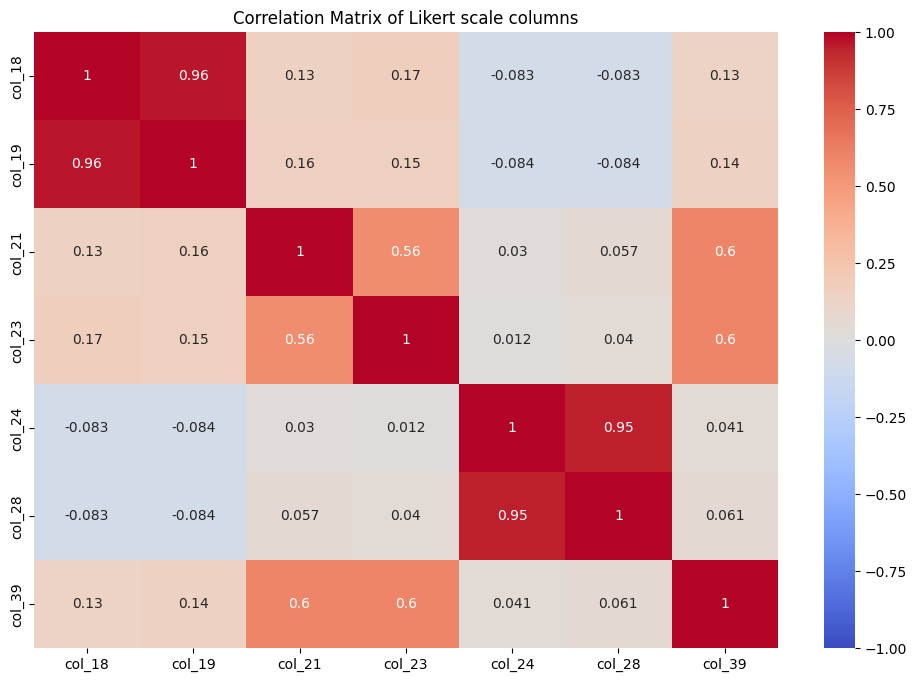

In [15]:
# Correlation analysis for Likert scale columns
correlation_matrix = df[likert_column_indices].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Likert scale columns")
plt.show()


2. Factor Analysis
Before we can perform factor analysis, you'll need to install the factor_analyzer package, which can be done with:

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 19.3 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=b3ac4b362f32cb11e2f75a4e7318925046a600faa9c7c3faccaa5f620bfd887e
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor-analyzer
        Factor 1  Factor 2  Factor 3
col_18  0.992103 -0.043598  0.095712
col_19  0.957506 -0.046505  0.109318
col_21  0.072754  0.024839  0.741538
co

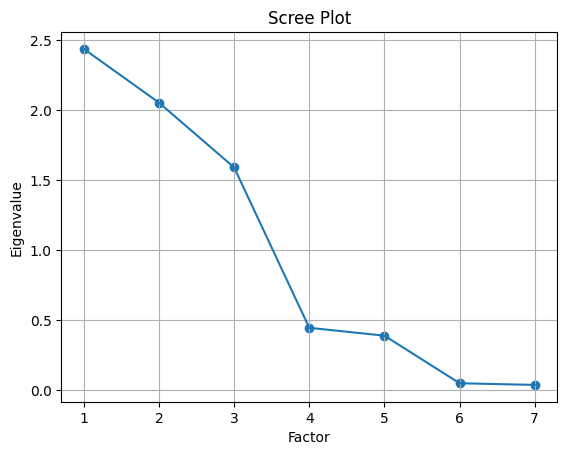

In [16]:
!pip install factor-analyzer
from factor_analyzer import FactorAnalyzer

# Factor Analysis
fa = FactorAnalyzer(rotation="varimax")
fa.fit(df[likert_column_indices])

# Get the loadings
loadings = fa.loadings_

# Convert loadings to a dataframe for better visualization
loadings_df = pd.DataFrame(loadings, columns=[f"Factor {i+1}" for i in range(loadings.shape[1])], index=likert_column_indices)
print(loadings_df)

# Scree plot
eigen_values, vectors = fa.get_eigenvalues()
plt.scatter(range(1, df[likert_column_indices].shape[1]+1), eigen_values)
plt.plot(range(1, df[likert_column_indices].shape[1]+1), eigen_values)
plt.title("Scree Plot")
plt.xlabel("Factor")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()


3. Regression Analysis
For regression analysis, let's assume you are using col_18 as the dependent variable and the rest of the Likert columns as predictors: **texto em negrito**

In [17]:
import statsmodels.api as sm

# Regression Analysis
X = df[likert_column_indices].drop('col_18', axis=1)  # Using all other Likert columns as predictors
X = sm.add_constant(X)  # Adding a constant (intercept)
y = df['col_18']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 col_18   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     367.7
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           6.06e-95
Time:                        15:38:10   Log-Likelihood:                -98.556
No. Observations:                 178   AIC:                             211.1
Df Residuals:                     171   BIC:                             233.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0186      0.157      0.119      0.9